In [1]:
%matplotlib inline
import os
import pandas as pd
from pandas import json_normalize

jsonl   = "/home/jovyan/datasets/ember/ember2018/train_features_0.jsonl"
csv_out = "/home/jovyan/datasets/ember/ember2018/train_features_sample.csv"

# Read a small, fast chunk
chunk = next(pd.read_json(jsonl, lines=True, chunksize=10_000))

cols = chunk.columns.tolist()
label_col = "label" if "label" in cols else ("y" if "y" in cols else None)

# Robust extraction of feature columns
if "features" in cols:
    # Case A: features are nested under 'features'
    feat = json_normalize(chunk["features"])
elif any(isinstance(v, dict) for v in chunk.iloc[0].tolist()):
    # Case B: each row itself contains dicts at top-level; normalize whole row
    feat = json_normalize(chunk.to_dict(orient="records"))
else:
    # Case C: already flat columns; drop obvious metadata, keep numerics
    meta = [c for c in ["sha256","md5","sha1","sha512","appeared","avclass"] if c in cols]
    if label_col: meta.append(label_col)
    feat = chunk.drop(columns=meta, errors="ignore").select_dtypes(include="number")

# Add label if present
if label_col:
    feat["label"] = chunk[label_col].astype(int)

# Save CSV and load it with read_csv
feat.to_csv(csv_out, index=False)
print("Wrote CSV:", csv_out, "rows:", len(feat), "cols:", len(feat.columns))

df = pd.read_csv(csv_out)   # pandas.read_csv
print("Loaded shape:", df.shape)
df.head()


Wrote CSV: /home/jovyan/datasets/ember/ember2018/train_features_sample.csv rows: 10000 cols: 3536


/tmp/ipykernel_1204/3313645890.py:36: DtypeWarning: Columns (52,55,56,59,61,62,63,65,66,67,68,69,70,72,73,74,75,76,77,78,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305

Loaded shape: (10000, 3536)


,sha256,md5,appeared,label,avclass,histogram,byteentropy,exports,datadirectories,strings.numstrings,...,imports.SPAXAcisBase.dll,imports.SPAzlibIntf.dll,imports.SPAXStStorage.dll,imports.SPAAcisDs.dll,imports.CXPORT.dll,imports.ExTrace.dll,imports.pe_cc.dll,imports.CEUTIL.dll,imports.api-ms-win-service-winsvc-l1-1-0.dll,imports.vmbkmcl.sys
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,63956d6417f8f43357d9a8e79e52257e,2006-12,0,NaN,"[45521, 13095, 12167, 12496, 12429, 11709, 118...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_...",14573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,6f7bde7a1126debf0cc359a54953efc1,2007-01,0,NaN,"[93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...","[47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_...",1803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eac8ddb4970f8af985742973d6f0e06902d42a3684d791...,7520c8f9534ca818726a4feaebf49e2b,2007-02,0,NaN,"[45369, 2560, 1233, 1542, 4234, 515, 613, 1542...","[6144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_...",1238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,e435a536968941854bcec3b902c439f6,2007-02,0,NaN,"[21315, 9641, 9332, 9358, 9598, 9220, 9146, 93...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_...",11166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,e93049e2df82ab26f35ad0049173cb14,2007-02,0,NaN,"[23539, 6015, 5214, 4727, 4892, 4649, 4367, 52...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_...",5547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


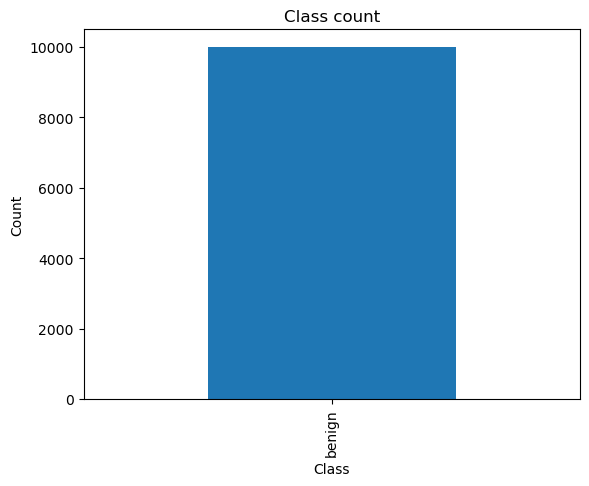

In [15]:
ax = df["label"].map({0:"benign", 1:"malicious"}).value_counts().plot(kind="bar")
ax.set_title("Class count")
ax.set_xlabel("Class"); ax.set_ylabel("Count")
plt.savefig("/home/jovyan/work/figures/benignvsmalicious.png", dpi=200, bbox_inches="tight")


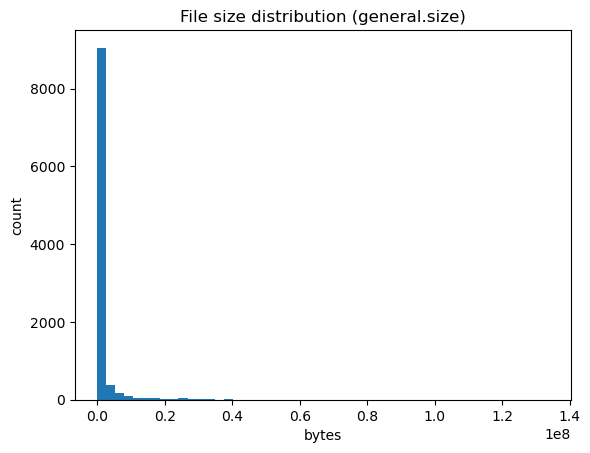

In [4]:
import matplotlib.pyplot as plt

plt.figure()
df["general.size"].dropna().plot(kind="hist", bins=50)
plt.title("File size distribution (general.size)")
plt.xlabel("bytes")
plt.ylabel("count")
plt.show()
plt.savefig("/home/jovyan/work/figures/Filesize.png", dpi=200, bbox_inches="tight")

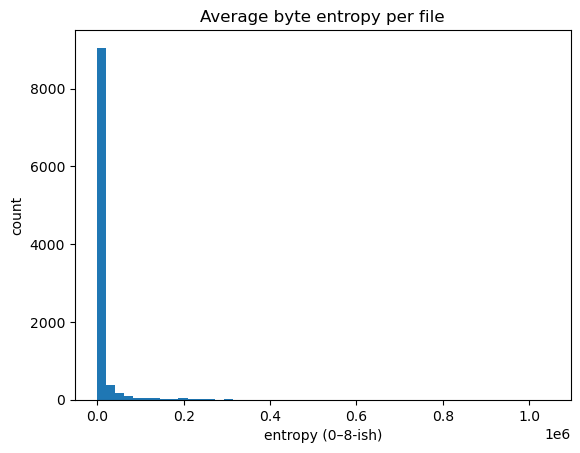

In [5]:
import ast
import numpy as np

def list_mean(s):
    try:
        arr = ast.literal_eval(s)
        if isinstance(arr, list) and len(arr)>0:
            return float(np.mean(arr))
    except Exception:
        pass
    return np.nan

df["entropy_mean"] = df["byteentropy"].apply(list_mean)

plt.figure()
df["entropy_mean"].dropna().plot(kind="hist", bins=50)
plt.title("Average byte entropy per file")
plt.xlabel("entropy (0–8-ish)"); plt.ylabel("count")
plt.show()


In [8]:
import_cols = [c for c in df.columns if c.startswith("imports.")]
imp = df[import_cols].apply(pd.to_numeric, errors="coerce").fillna(0)
df["imports_count"] = (imp > 0).sum(axis=1)


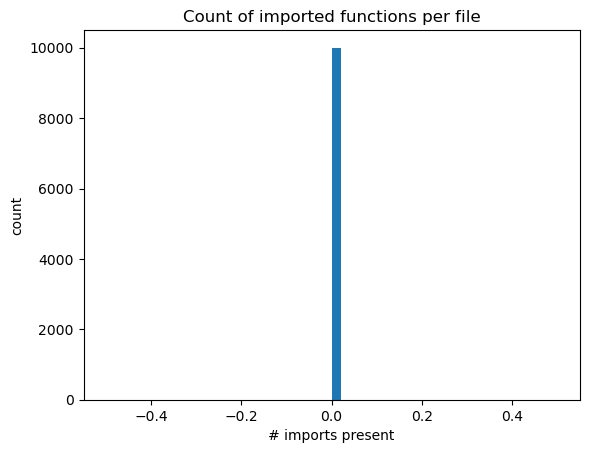

In [10]:
import matplotlib.pyplot as plt

plt.figure()
df["imports_count"].plot(kind="hist", bins=50)
plt.title("Count of imported functions per file")
plt.xlabel("# imports present"); plt.ylabel("count")
plt.show()


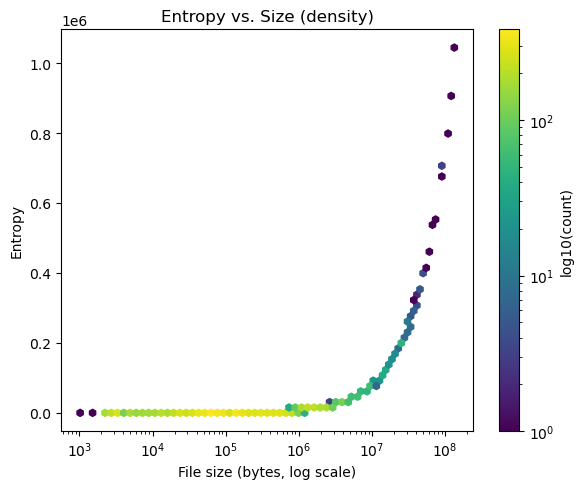

Saved to: /home/jovyan/work/figures/entropy_vs_size_hex.png


In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt

# 0) Make sure the folder exists (safe to run every time)
FIG_DIR = Path("/home/jovyan/work/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)

# 1) plot
dense = df[["general.size", "entropy_mean"]].dropna()

fig, ax = plt.subplots(figsize=(6, 5))
hb = ax.hexbin(dense["general.size"], dense["entropy_mean"],
               gridsize=60, xscale="log", bins="log")
fig.colorbar(hb, label="log10(count)")
ax.set_xlabel("File size (bytes, log scale)")
ax.set_ylabel("Entropy")
ax.set_title("Entropy vs. Size (density)")
fig.tight_layout()

# 2) Save to figures folder
out_path = FIG_DIR / "entropy_vs_size_hex.png"   # change name if you like
fig.savefig(out_path, dpi=200, bbox_inches="tight")

plt.show()

print("Saved to:", out_path)
